In [7]:
%pip install pandas numpy matplotlib torch scikit-learn

  Using cached torch-2.2.2-cp312-none-macosx_10_9_x86_64.whl.metadata (25 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2024.10.0-py3-none-any.whl.metadata (11 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torch-2.2.2-cp312-none-macosx_10_9_x86_64.whl (150.8 MB)
Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
Using cached fsspec-2024.10.0-py3-none-any.whl (179 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Using cached sympy-1.13.3-py3-none-any.whl (6.2 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles for visualization
plt.style.use('seaborn')
sns.set_context("notebook")

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [2]:
import os
import pandas as pd

# Function to load data from multiple CSV files in a specified folder
def load_data_from_folder(folder_path):
    data_frames = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            try:
                # Attempt to read the file with different encodings
                df = pd.read_csv(file_path, delimiter=';', encoding='utf-8')  # First try utf-8
            except UnicodeDecodeError:
                # If utf-8 fails, try 'ISO-8859-1'
                df = pd.read_csv(file_path, delimiter=';', encoding='ISO-8859-1')
            data_frames.append(df)
    # Concatenate all data frames into one
    return pd.concat(data_frames, ignore_index=True)

# Define the folder paths for measurement and simulation data
measurement_folder = '/Users/mangalabhandarkar/Downloads/Measurement Data'  # Adjust this path as needed
simulation_folder = '/Users/mangalabhandarkar/Downloads/Simulation Data'  # Adjust this path as needed

# Load Measurement and Simulation Data
measurement_data = load_data_from_folder(measurement_folder)
simulation_data = load_data_from_folder(simulation_folder)

# Display the first few rows of the loaded data for verification
print("Measurement Data:")
print(measurement_data.head())
print("\nSimulation Data:")
print(simulation_data.head())


/var/folders/m4/vz9m_jjs5xl0qg9wgv2_bfph0000gp/T/ipykernel_17292/2707991011.py:12: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=';', encoding='utf-8')  # First try utf-8
/var/folders/m4/vz9m_jjs5xl0qg9wgv2_bfph0000gp/T/ipykernel_17292/2707991011.py:12: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=';', encoding='utf-8')  # First try utf-8
/var/folders/m4/vz9m_jjs5xl0qg9wgv2_bfph0000gp/T/ipykernel_17292/2707991011.py:12: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed

Measurement Data:
   Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  Motor Torque [Nm]  \
0       0.0              0.0          521.0           0.0                0.0   
1       0.1              0.0          521.0           0.0                0.0   
2       0.2              0.0          521.0           0.0                0.0   
3       0.3              0.0          521.0           0.0                0.0   
4       0.4              0.0          521.0           0.0                0.0   

   Longitudinal Acceleration [m/s^2]  Regenerative Braking Signal   \
0                           -0.10800                           0.0   
1                           -0.09862                           0.0   
2                           -0.11609                           0.0   
3                           -0.12928                           0.0   
4                           -0.10800                           0.0   

   Battery Voltage [V]  Battery Current [A]  Battery Temperature [°C]  ...  \
0 

In [4]:
from sklearn.preprocessing import MinMaxScaler
# 2. Data Preprocessing
# Select relevant features for SoC estimation
features = [
    'Battery Voltage [V]', 
    'Battery Current [A]', 
    'Battery Temperature [°C]', 
    'SoC [%]',  # Target variable
    'Heating Power CAN [kW]', 
    'Heating Power LIN [W]',
    'Requested Heating Power [W]'
]

measurement_features = measurement_data[features].copy()
measurement_features.rename(columns={
    'Battery Voltage [V]': 'Voltage', 
    'Battery Current [A]': 'Current', 
    'Battery Temperature [°C]': 'Temperature', 
    'SoC [%]': 'SoC',
    'Heating Power CAN [kW]': 'Heating_CAN', 
    'Heating Power LIN [W]': 'Heating_LIN', 
    'Requested Heating Power [W]': 'Requested_Heating'
}, inplace=True)

# Drop rows with missing values
measurement_features.dropna(inplace=True)

# Normalize the features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(measurement_features[['Voltage', 'Current', 'Temperature', 'Heating_CAN', 'Heating_LIN', 'Requested_Heating']])


In [5]:

# Prepare the dataset
X = normalized_features  # Input features
y = measurement_features['SoC'].values.reshape(-1, 1)  # Target variable

In [7]:
from sklearn.model_selection import train_test_split
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Data Summary:
             Voltage        Current    Temperature            SoC  \
count  753413.000000  753413.000000  753413.000000  753413.000000   
mean      373.693595     -21.369152      12.341454      62.581060   
std        12.476492      45.332153       6.186367      15.811496   
min       301.800000    -404.380000      -1.000000       0.000000   
25%       365.990000     -35.740000       8.000000      52.200000   
50%       375.800000     -13.440000      12.000000      65.400000   
75%       383.410000      -2.873280      18.000000      74.400000   
max       394.670000     144.490000      26.000000      87.400000   

         Heating_CAN    Heating_LIN  Requested_Heating  
count  753413.000000  753413.000000      753413.000000  
mean        1.392863    1379.353306        1395.610746  
std         1.757774    1723.036230        1709.561043  
min         0.000000       0.000000           0.000000  
25%         0.680000     650.720000         720.000000  
50%         1.080000  

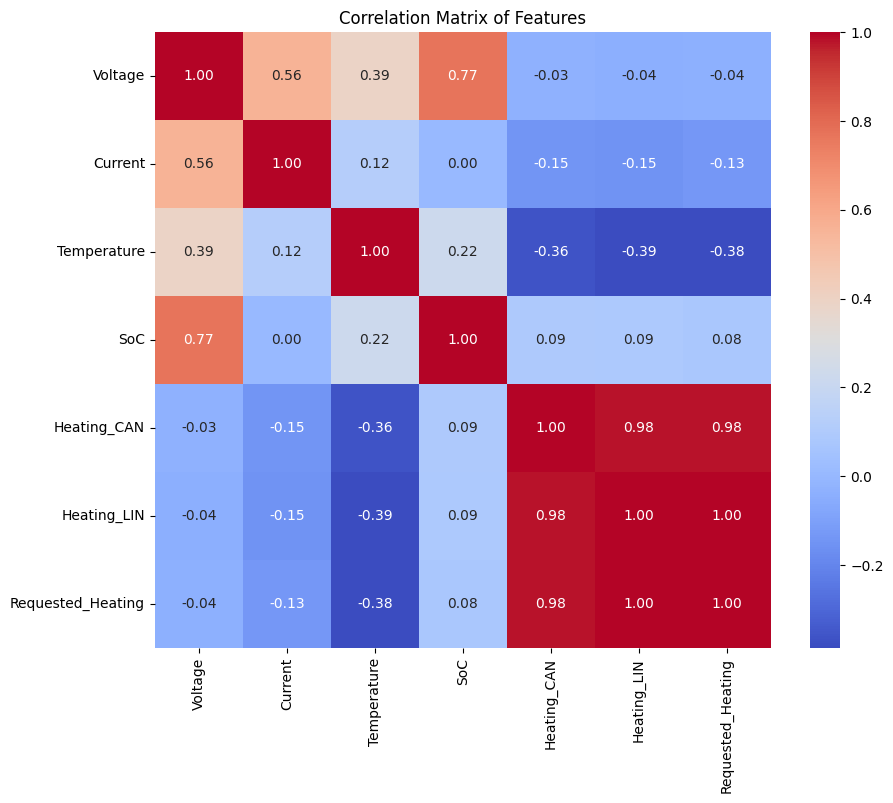

In [10]:
# 3. Data Exploration and Visualization
def explore_data(data):
    print("Data Summary:")
    print(data.describe())
    print("\nCorrelation Matrix:")
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Matrix of Features')
    plt.show()

# Explore the Measurement Features
explore_data(measurement_features)

In [16]:

# 5. Training the Model(Failed. Which is why implemented other hyperparameter tuning. Loss value too high)
def train_model_with_soc(model, X_train, y_train, current, initial_soc, battery_capacity, time_intervals, num_epochs=1000, learning_rate=0.001):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()
    losses = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(torch.tensor(X_train, dtype=torch.float32))
        
        # Reshape y_train
        y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
        
        # Calculate loss
        loss = criterion(outputs, y_train_tensor)
        losses.append(loss.item())
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    return losses

In [17]:
initial_soc = 50.0 
battery_capacity = 100.0  
time_intervals = np.ones(X_train.shape[0])  

# Instantiate and train the model
model = PINN()
losses = train_model_with_soc(model, X_train, y_train, X_train[:, 1], initial_soc, battery_capacity, time_intervals)


Epoch [100/1000], Loss: 2944.2957
Epoch [200/1000], Loss: 190.8000
Epoch [300/1000], Loss: 185.3609
Epoch [400/1000], Loss: 183.1362
Epoch [500/1000], Loss: 180.6629
Epoch [600/1000], Loss: 177.9589
Epoch [700/1000], Loss: 175.0250
Epoch [800/1000], Loss: 171.8506
Epoch [900/1000], Loss: 168.4155
Epoch [1000/1000], Loss: 164.6909


In [26]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert the data into PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Create TensorDataset and DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Define the PINN model
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(6, 50)  # Input features (6)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)  # Output (SoC)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Initialize the model, move to GPU if available
model = PINN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Train the model
def train_model_with_soc(model, train_loader, val_loader, num_epochs=1000, patience=10, lr=0.001, weight_decay=1e-5, max_grad_norm=1.0):
    """
    Train the model with a more robust training loop that includes learning rate scheduling,
    early stopping, gradient clipping, and weight decay for better generalization and convergence.
    
    Args:
    - model (torch.nn.Module): The model to train.
    - train_loader (DataLoader): DataLoader for training data.
    - val_loader (DataLoader): DataLoader for validation data.
    - num_epochs (int): Number of epochs to train for.
    - patience (int): Early stopping patience for validation loss.
    - lr (float): Initial learning rate.
    - weight_decay (float): Weight decay (L2 regularization) for optimizer.
    - max_grad_norm (float): Maximum gradient norm for clipping.
    
    Returns:
    - model (torch.nn.Module): Trained model.
    - train_losses (list): Training loss per epoch.
    - val_losses (list): Validation loss per epoch.
    """
    
    # Define loss function and optimizer
    criterion = nn.MSELoss()  # Example loss, adjust based on your task
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Learning rate scheduler
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

    best_val_loss = float('inf')
    early_stop_counter = 0
    train_losses, val_losses = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()  # Set the model to training mode
        running_train_loss = 0.0
        
        for inputs, labels in train_loader:
            # Move data to GPU if available
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()  # Zero the parameter gradients

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()

            # Gradient clipping
            nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)

            optimizer.step()

            running_train_loss += loss.item() * inputs.size(0)  # Accumulate the loss

        # Calculate average training loss for the epoch
        avg_train_loss = running_train_loss / len(train_loader.dataset)
        train_losses.append(avg_train_loss)
        
        # Validation phase
        model.eval()
        running_val_loss = 0.0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item() * inputs.size(0)

        avg_val_loss = running_val_loss / len(val_loader.dataset)
        val_losses.append(avg_val_loss)

        print(f'Epoch [{epoch}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

        # Check for early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            early_stop_counter = 0
        else:
            early_stop_counter += 1

        if early_stop_counter >= patience:
            print(f"Early stopping triggered after {epoch} epochs")
            break

        # Adjust learning rate based on validation loss
        scheduler.step(avg_val_loss)
    
    return model, train_losses, val_losses


# Now train the model
trained_model, train_losses, val_losses = train_model_with_soc(model, train_loader, val_loader, num_epochs=100, patience=10, lr=0.001)



/Users/mangalabhandarkar/Desktop/Autonomous/.venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch [1/100], Train Loss: 58.1396, Val Loss: 17.5844
Epoch [2/100], Train Loss: 16.9711, Val Loss: 17.1874
Epoch [3/100], Train Loss: 16.1797, Val Loss: 15.8873
Epoch [4/100], Train Loss: 15.7675, Val Loss: 16.0463
Epoch [5/100], Train Loss: 15.3299, Val Loss: 14.7494
Epoch [6/100], Train Loss: 14.9337, Val Loss: 14.3482
Epoch [7/100], Train Loss: 14.5545, Val Loss: 14.1511
Epoch [8/100], Train Loss: 14.1443, Val Loss: 13.7233
Epoch [9/100], Train Loss: 13.8271, Val Loss: 13.5791
Epoch [10/100], Train Loss: 13.4912, Val Loss: 13.1062
Epoch [11/100], Train Loss: 13.2118, Val Loss: 13.7458
Epoch [12/100], Train Loss: 13.0303, Val Loss: 12.7947
Epoch [13/100], Train Loss: 12.8209, Val Loss: 12.4404
Epoch [14/100], Train Loss: 12.6801, Val Loss: 14.1918
Epoch [15/100], Train Loss: 12.5363, Val Loss: 12.3827
Epoch [16/100], Train Loss: 12.4399, Val Loss: 13.7860
Epoch [17/100], Train Loss: 12.3124, Val Loss: 11.9213
Epoch [18/100], Train Loss: 12.1140, Val Loss: 11.8995
Epoch [19/100], Tra

In [29]:
# Save the entire model
torch.save(trained_model.state_dict(), 'pinn_model_without_physics.pth')

print("Model saved successfully!")

Model saved successfully!


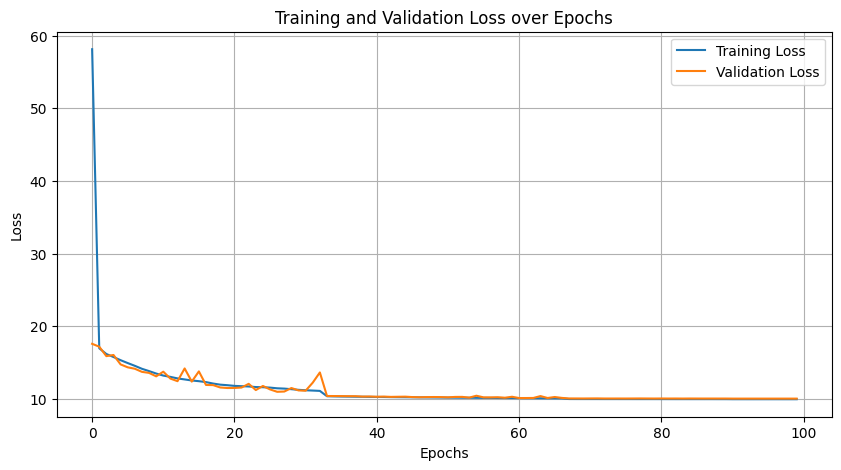

In [30]:
import matplotlib.pyplot as plt

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

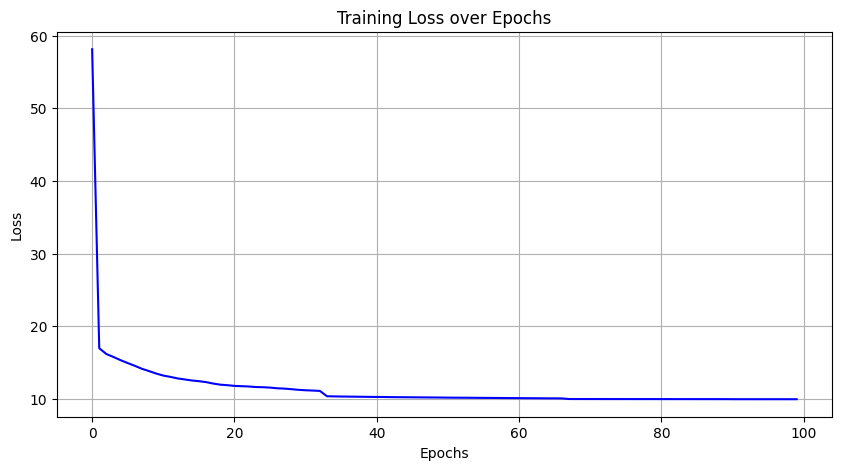

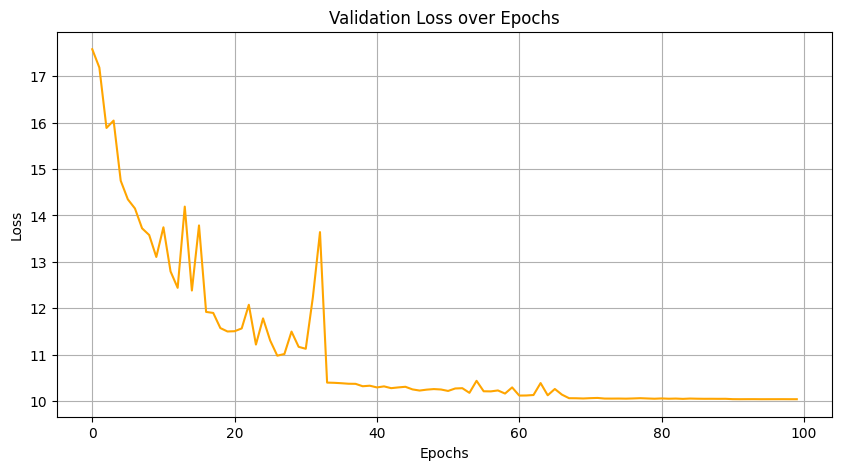

In [31]:
import matplotlib.pyplot as plt

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()

# Plot validation loss
plt.figure(figsize=(10, 5))
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss over Epochs')
plt.grid(True)
plt.show()


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# After validation loss calculation
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for batch in val_loader:
        inputs, labels = batch
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
        
        outputs = model(inputs)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(outputs.cpu().numpy())

# Convert to numpy arrays for metric calculations
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate regression metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f'MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}')


MAE: 2.2415, MSE: 10.0393, RMSE: 3.1685, R^2: 0.9597


In [32]:
import pandas as pd

# Calculate regression metrics (from your existing code)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R^2'],
    'Value': [mae, mse, rmse, r2]
})

# Save the DataFrame to a CSV file
metrics_df.to_csv('regression_metrics.csv', index=False)

print(f'Metrics saved to regression_metrics.csv')


Metrics saved to regression_metrics.csv


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import OneCycleLR
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Data preprocessing
def prepare_data(X_train, y_train, X_val, y_val, batch_size=32):
    # Initialize scalers
    x_scaler = StandardScaler()
    y_scaler = StandardScaler()
    
    # Fit and transform training data
    X_train_scaled = x_scaler.fit_transform(X_train)
    y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
    
    # Transform validation data
    X_val_scaled = x_scaler.transform(X_val)
    y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1)).flatten()
    
    # Convert to tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_tensor = torch.FloatTensor(y_train_scaled)
    X_val_tensor = torch.FloatTensor(X_val_scaled)
    y_val_tensor = torch.FloatTensor(y_val_scaled)
    
    # Create datasets and dataloaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    
    return train_loader, val_loader, x_scaler, y_scaler

class ImprovedPINN(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 256, 128], dropout_rate=0.1):
        super(ImprovedPINN, self).__init__()
        
        # Input batch normalization
        self.input_bn = nn.BatchNorm1d(input_dim)
        
        # Build dynamic layer architecture
        layers = []
        prev_dim = input_dim
        
        for hidden_dim in hidden_dims:
            layers.extend([
                nn.Linear(prev_dim, hidden_dim),
                nn.BatchNorm1d(hidden_dim),
                nn.LeakyReLU(negative_slope=0.1),
                nn.Dropout(dropout_rate)
            ])
            prev_dim = hidden_dim
        
        # Output layer
        layers.append(nn.Linear(prev_dim, 1))
        
        self.network = nn.Sequential(*layers)
        
        # Initialize weights using He initialization
        self.apply(self._init_weights)
    
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.kaiming_normal_(module.weight, mode='fan_in', nonlinearity='leaky_relu')
            if module.bias is not None:
                nn.init.zeros_(module.bias)
    
    def forward(self, x):
        x = self.input_bn(x)
        return self.network(x).squeeze()

def physics_loss(inputs, outputs, initial_soc, q_capacity, dt=1.0):
    """Enhanced physics-informed loss with time-step consideration"""
    current = inputs[:, 0]  # Assuming current is the first feature
    
    # Improved integral approximation using trapezoidal rule
    cumulative_current = torch.cumsum(current * dt, dim=0)
    
    # Calculate theoretical SoC change
    delta_soc = cumulative_current / q_capacity
    theoretical_soc = initial_soc + delta_soc
    
    # Constrain SoC to physical limits [0, 1]
    theoretical_soc = torch.clamp(theoretical_soc, 0, 1)
    
    # Calculate physics loss with L1 and L2 components
    l1_loss = torch.mean(torch.abs(outputs - theoretical_soc))
    l2_loss = torch.mean((outputs - theoretical_soc) ** 2)
    
    return 0.5 * l1_loss + 0.5 * l2_loss

def train_model(model, train_loader, val_loader, num_epochs=100, initial_soc=0.5, q_capacity=100):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    # Loss functions
    criterion = nn.HuberLoss(delta=0.1)  # More robust than MSE
    
    # Optimizer with gradient clipping
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
    
    # One Cycle learning rate scheduler
    steps_per_epoch = len(train_loader)
    scheduler = OneCycleLR(
        optimizer,
        max_lr=0.01,
        epochs=num_epochs,
        steps_per_epoch=steps_per_epoch,
        pct_start=0.3,
        anneal_strategy='cos'
    )
    
    best_val_loss = float('inf')
    best_model_state = None
    patience = 10
    patience_counter = 0
    
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        epoch_train_loss = 0.0
        
        for batch_idx, (inputs, targets) in enumerate(train_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            
            # Combined loss
            data_loss = criterion(outputs, targets)
            phy_loss = physics_loss(inputs, outputs, initial_soc, q_capacity)
            total_loss = data_loss + 0.1 * phy_loss
            
            total_loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            scheduler.step()
            
            epoch_train_loss += total_loss.item()
        
        avg_train_loss = epoch_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        # Validation phase
        model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                val_loss = criterion(outputs, targets)
                epoch_val_loss += val_loss.item()
        
        avg_val_loss = epoch_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        
        # Early stopping check
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
        
        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch}")
            break
        
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {avg_train_loss:.4f}, '
              f'Val Loss: {avg_val_loss:.4f}')
    
    # Load best model
    model.load_state_dict(best_model_state)
    return model, train_losses, val_losses

# Usage example
def main(X_train, y_train, X_val, y_val):
    # Prepare data
    train_loader, val_loader, x_scaler, y_scaler = prepare_data(
        X_train, y_train, X_val, y_val, batch_size=32
    )
    
    # Initialize model
    input_dim = X_train.shape[1]
    model = ImprovedPINN(
        input_dim=input_dim,
        hidden_dims=[128, 256, 128],
        dropout_rate=0.1
    )
    
    # Train model
    trained_model, train_losses, val_losses = train_model(
        model,
        train_loader,
        val_loader,
        num_epochs=100
    )
    
    return trained_model, train_losses, val_losses, x_scaler, y_scaler

In [36]:
# Assuming you have your data ready
trained_model, train_losses, val_losses, x_scaler, y_scaler = main(X_train, y_train, X_val, y_val)

Epoch [1/100], Train Loss: 0.0751, Val Loss: 0.0560
Epoch [2/100], Train Loss: 0.0733, Val Loss: 0.0540
Epoch [3/100], Train Loss: 0.0730, Val Loss: 0.0545
Epoch [4/100], Train Loss: 0.0729, Val Loss: 0.0527
Epoch [5/100], Train Loss: 0.0728, Val Loss: 0.0552
Epoch [6/100], Train Loss: 0.0728, Val Loss: 0.0533
Epoch [7/100], Train Loss: 0.0728, Val Loss: 0.0544
Epoch [8/100], Train Loss: 0.0728, Val Loss: 0.0536
Epoch [9/100], Train Loss: 0.0728, Val Loss: 0.0566
Epoch [10/100], Train Loss: 0.0728, Val Loss: 0.0536
Epoch [11/100], Train Loss: 0.0728, Val Loss: 0.0571
Epoch [12/100], Train Loss: 0.0728, Val Loss: 0.0552
Epoch [13/100], Train Loss: 0.0728, Val Loss: 0.0525
Epoch [14/100], Train Loss: 0.0729, Val Loss: 0.0564
Epoch [15/100], Train Loss: 0.0728, Val Loss: 0.0514
Epoch [16/100], Train Loss: 0.0729, Val Loss: 0.0545
Epoch [17/100], Train Loss: 0.0729, Val Loss: 0.0513
Epoch [18/100], Train Loss: 0.0729, Val Loss: 0.0544
Epoch [19/100], Train Loss: 0.0729, Val Loss: 0.0561
Ep

In [37]:
# Save the trained model
model_save_path = "improved_pinn_model_with_socformula.pth"  # Specify your desired file path
torch.save(trained_model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to improved_pinn_model_with_socformula.pth


In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt  # For plotting

# Data preparation with scaling
def prepare_data(X_train, y_train, X_val, y_val, batch_size=32):
    # Initialize scaler
    scaler = StandardScaler()
    
    # Fit and transform training data
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # Convert to tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_tensor = torch.FloatTensor(y_train)
    X_val_tensor = torch.FloatTensor(X_val_scaled)
    y_val_tensor = torch.FloatTensor(y_val)
    
    # Create datasets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    
    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    
    return train_loader, val_loader, scaler

class OptimizedPINN(nn.Module):
    def __init__(self, input_size=6):
        super(OptimizedPINN, self).__init__()
        
        # Layer architecture similar to the successful model
        self.input_bn = nn.BatchNorm1d(input_size)
        
        self.fc1 = nn.Linear(input_size, 50)
        self.bn1 = nn.BatchNorm1d(50)
        self.dropout1 = nn.Dropout(0.1)
        
        self.fc2 = nn.Linear(50, 50)
        self.bn2 = nn.BatchNorm1d(50)
        self.dropout2 = nn.Dropout(0.1)
        
        self.fc3 = nn.Linear(50, 1)
        
        # Initialize weights
        self.apply(self._init_weights)
    
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.kaiming_normal_(module.weight, nonlinearity='relu')
            if module.bias is not None:
                nn.init.constant_(module.bias, 0)
    
    def forward(self, x):
        # Input normalization
        x = self.input_bn(x)
        
        # First layer
        x = self.fc1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.dropout1(x)
        
        # Second layer
        x = self.fc2(x)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.dropout2(x)
        
        # Output layer
        x = self.fc3(x)
        return x

def train_model(model, train_loader, val_loader, num_epochs=100, patience=15):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    # Combined loss function
    criterion = nn.HuberLoss(delta=0.1)  # More robust than MSE
    
    # Optimizer with mild L2 regularization
    optimizer = optim.AdamW(
        model.parameters(),
        lr=0.001,
        weight_decay=1e-5,
        betas=(0.9, 0.999)
    )
    
    # Learning rate scheduler
    scheduler = ReduceLROnPlateau(
        optimizer,
        mode='min',
        factor=0.5,
        patience=5,
        verbose=True,
        min_lr=1e-6
    )
    
    best_val_loss = float('inf')
    best_model_state = None
    patience_counter = 0
    train_losses, val_losses = [], []
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            
            loss = criterion(outputs.squeeze(), targets)
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
        
        avg_train_loss = train_loss / len(train_loader.dataset)
        train_losses.append(avg_train_loss)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), targets)
                val_loss += loss.item() * inputs.size(0)
        
        avg_val_loss = val_loss / len(val_loader.dataset)
        val_losses.append(avg_val_loss)
        
        # Print progress
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {avg_train_loss:.4f}, '
              f'Val Loss: {avg_val_loss:.4f}')
        
        # Learning rate scheduling
        scheduler.step(avg_val_loss)
        
        # Early stopping check
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            
        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break
    
    # Load best model
    model.load_state_dict(best_model_state)
    
    # Plot training and validation losses
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses')
    plt.legend()
    plt.show()
    
    return model, train_losses, val_losses

def predict_and_evaluate(model, X_test, y_test, scaler):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    
    # Prepare test data
    X_test_scaled = scaler.transform(X_test)
    X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
    
    # Make predictions
    with torch.no_grad():
        y_pred = model(X_test_tensor).cpu().numpy()
    
    # Convert y_test to numpy for metric calculations
    y_test = np.array(y_test)
    
    # Calculate metrics
    mae = np.mean(np.abs(y_pred - y_test))
    mse = np.mean((y_pred - y_test) ** 2)
    rmse = np.sqrt(mse)
    r2 = 1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
    
    return {
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }, y_pred

# Usage example
def main(X_train, y_train, X_val, y_val, X_test, y_test):
    # Prepare data
    train_loader, val_loader, scaler = prepare_data(X_train, y_train, X_val, y_val)
    
    # Initialize model
    model = OptimizedPINN(input_size=X_train.shape[1])
    
    # Train model
    trained_model, train_losses, val_losses = train_model(
        model,
        train_loader,
        val_loader,
        num_epochs=100,
        patience=15
    )
    
    # Evaluate model
    metrics, predictions = predict_and_evaluate(trained_model, X_test, y_test, scaler)
    
    print("\nModel Performance Metrics:")
    print(f"MAE: {metrics['mae']:.4f}")
    print(f"MSE: {metrics['mse']:.4f}")
    print(f"RMSE: {metrics['rmse']:.4f}")
    print(f"R²: {metrics['r2']:.4f}")
    
    return trained_model, metrics, predictions


In [64]:
trained_model, metrics, predictions = main(X_train, y_train, X_val, y_val, X_test, y_test)

NameError: name 'X_test' is not defined